-THIS IS THE ARTICLE I WILL BE USING TO PICK MY SEED WORDS
# Stewart A. E. (2021). Psychometric Properties of the Climate Change Worry Scale. International journal of environmental research and public health, 18(2), 494. https://doi.org/10.3390/ijerph18020494

## First we create a dataset with the tokenized movie dialogues, with a movie per row

In [1]:
## Here we collect the relevant data to generate a dataset with word frequencies
## For each text in the corpus, we collect author, year, title, and the tokenized text
## In this example author, year and title are expressed in the file name 

import os
from os import path

## Collect preprocessed texts in txt format
root_folder = os.getcwd()
print(root_folder)

## this is a list which will store the relevant data to the dataframe
data_to_df =[]

## This iterates over your path, folders and subfolders looking for txt files
for path, subdirs, files in os.walk(root_folder):
    for file in files:

        ## list where we will store the relevant data for this text 
        text_data = []

        ## list in which we will stored tokenized text
        tokenized_text = []
        
        if '.txt' in file[-4:] and 'model' not in file:
            print(file)

            ## we can obtain author, year, title from filename
            author = file.split('-')[0]
            year = int(file.split('-')[1])
            title = file.split('-')[2]
            
            ## we get the full path and open the file
            name = os.path.join(path, file)
            file_text = open(name, encoding = 'utf-8',errors='ignore').read()

            ## this creates the list of paragraphs - lines
            text_list_paragraphs = file_text.split('\n')

            ## this will clean the paragraphs further -- getting read of \r at the end of the line
            for paragraph in text_list_paragraphs:
                #print (paragraph)
                
                paragraph = paragraph.replace('\r', '')

                ## we add the paragraphs to the word2vec input list
                tokenized_text += paragraph.split(' ')

            ## store relevant info into a variable
            text_data = [author,year,title,list(filter(None,tokenized_text)),list(filter(None,text_list_paragraphs))]#[author,year,title,tokenized_text]

            ## store the relevant data of each text into a general list of lists
            data_to_df += [text_data]

C:\Users\azeez\Documents\EM3 SUBMISSION FOLDER\scripts
aaditya-2012-Climate responsive.txt
abdel-2013-Ski.txt
abdul-2012-Mod.txt
abo-2012-Microaerobic.txt
Abu-2009-compression.txt
afonso-2013-Tracer gas.txt
afrasiabian-2019-analysis.txt
agrawal-2011-Flow characteristics.txt
agrawal-2012-Study.txt
agyeni-2012-Experimenta.txt
ahmad-2016-Investigation of the ef.txt
ahmadi-2016-Applying.txt
ahmadi-2016-Thermodynamic anal.txt
ahmadi-2020-Portfolio optimization.txt
ahmed-2018-Design methodology.txt
Ajay-2009-simultaneous.txt
akyuz-2010-Energetic.txt
alamier-2020- Synthesi.txt
alayietal-2020-Energy.txt
alayietal-2020-Technical and environmental.txt
aldali-2011-energetic.txt
aldali-2011-Solar absorber tube analysis.txt
aleknaviciute-2012-Plasma assis.txt
aleknaviviute-2016-Towards clean.txt
alexander-2013-solid sorption.txt
ali ahmadi-2016-Modeling solubility of carb.txt
alkhalidi etal-2019-Energy efficient cooling.txt
alkhalidi etal-2020-Using Wood.txt
alkhalidi-2020- Do green buildings.txt
A

lin etal-2018-Experimental study on im.txt
lin-2016-Stratum ventilation a low c.txt
ling etal-2013-The numerical s.txt
Lingen-2013-cycle.txt
lisha etal-2018-Structural rec.txt
Liu etal-2009-comparative study.txt
liu etal-2010-domestic biomas.txt
Ma etal-2008-microencapsulated phase.txt
maciel etal-2013-The impact.txt
madvar etal-2018-Analysis.txt
Maheshwari etal-2009-performance analysis.txt
maheshwari-2009-Performance.txt
mahmood etal-2019-Energy.txt
malakhov-2010-Economic.txt
maleki-2018-Modeling and optimum design.txt
man etal-2010-Operation.txt
marchetti-2010-Production.txt
markus-2013-Advanced.txt
marquiz-2013-analysis.txt
maslennikov etal-2010-Advanced.txt
mattera etal-2018-Online Energy Simulator.txt
mccarthy-2011-Comparison of the perfor.txt
mehrabian-2010-wet heat exchangers.txt
mempouo-2010-Cod.txt
meng etal-2010-Effects.txt
meng etal-2010-Multiobjective analyses.txt
Michel Gueldry-2018-Climate.txt
michelle-2013-A preliminary.txt
mohamed-2011-Exploring.txt
Mohammad etal-2020-

In [2]:
len(data_to_df)

607

In [3]:
import pandas as pd

# Create the pandas DataFrame
df = pd.DataFrame(data_to_df, columns = ['author', 'year','title','tokenized_text','lines'])
  
# print dataframe.
df.to_csv('Climate_tokenized.csv')
df

,author,year,title,tokenized_text,lines
0,aaditya,2012,Climate responsive.txt,"[Climate-responsive, integrability, of, buildi...","[Climate-responsive integrability, of building..."
1,abdel,2013,Ski.txt,"[Skills, development, for, retrofitting, a, hi...",[Skills development for retrofitting a histori...
2,abdul,2012,Mod.txt,"[Modeling, of, a, maximum, power, point, track...","[Modeling of a maximum power point tracker, fo..."
3,abo,2012,Microaerobic.txt,"[Microaerobic, dark, fermentative, hydrogen, p...","[Microaerobic dark fermentative hydrogen, prod..."
4,Abu,2009,compression.txt,"[New, technique, of, air-cooled, absorption, s...","[New technique of air-cooled absorption, syste..."
...,...,...,...,...,...
602,zhu,2020,The influence.txt,"[Cheng, Zhu1,2,, *, 1, Hohai, University,, Col...","[Cheng Zhu1,2, *, 1, Hohai University, College..."
603,Zhuetal,2020,aerolastic.txt,"[Aerodynamic, and, structural, optimization, o...","[Aerodynamic and structural optimization of, w..."
604,zishang,2012,Assessment.txt,"[Assessment, of, the, technical, potential, fo...","[Assessment of the technical potential for, mu..."
605,Zisisetal,2006,heat.txt,"[Investigation, of, the, performance, of, heat...","[Investigation of the performance of heat, pip..."


## Then we calculate the sentiment score for each movie

In [ ]:
# !pip install vaderSentiment
# !pip install flair
# !pip install textblob
# !pip install afinn



In [5]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from afinn import Afinn
afinn = Afinn(language='en')


In [6]:
## Functions to calculate sentiment scores with:

#Vader
def vader_score(sentences):
  sum_score = 0
  for sentence in sentences:
    score  = analyzer.polarity_scores(sentence)['compound']
    sum_score += score
  mean_score = sum_score / len(sentences)
  return(mean_score)

## TextBlob
def textBlob_score(sentences):
  sum_score = 0
  for sentence in sentences:
    score  = TextBlob(sentence).sentiment.polarity
    sum_score += score
  mean_score = sum_score / len(sentences)
  return(mean_score)


# Afinn
def afinn_sentiment(tokenized_sentence):
  sentence_length = len(tokenized_sentence)
  score = afinn.score(" ".join(tokenized_sentence))/sentence_length
  return score


In [7]:
df['blob'] = df['lines'].apply(textBlob_score)
df['vader'] = df['lines'].apply(vader_score)
df['afinn'] = df['tokenized_text'].apply(afinn_sentiment)


In [8]:
df

,author,year,title,tokenized_text,lines,blob,vader,afinn
0,aaditya,2012,Climate responsive.txt,"[Climate-responsive, integrability, of, buildi...","[Climate-responsive integrability, of building...",0.047855,0.061887,0.033935
1,abdel,2013,Ski.txt,"[Skills, development, for, retrofitting, a, hi...",[Skills development for retrofitting a histori...,0.041300,0.072724,0.032645
2,abdul,2012,Mod.txt,"[Modeling, of, a, maximum, power, point, track...","[Modeling of a maximum power point tracker, fo...",0.023567,0.044193,0.002559
3,abo,2012,Microaerobic.txt,"[Microaerobic, dark, fermentative, hydrogen, p...","[Microaerobic dark fermentative hydrogen, prod...",0.024127,0.058738,0.019254
4,Abu,2009,compression.txt,"[New, technique, of, air-cooled, absorption, s...","[New technique of air-cooled absorption, syste...",0.020368,0.010689,-0.023200
...,...,...,...,...,...,...,...,...
602,zhu,2020,The influence.txt,"[Cheng, Zhu1,2,, *, 1, Hohai, University,, Col...","[Cheng Zhu1,2, *, 1, Hohai University, College...",0.055344,0.087399,0.043302
603,Zhuetal,2020,aerolastic.txt,"[Aerodynamic, and, structural, optimization, o...","[Aerodynamic and structural optimization of, w...",0.037176,0.072766,0.011186
604,zishang,2012,Assessment.txt,"[Assessment, of, the, technical, potential, fo...","[Assessment of the technical potential for, mu...",0.022624,0.062567,0.016500
605,Zisisetal,2006,heat.txt,"[Investigation, of, the, performance, of, heat...","[Investigation of the performance of heat, pip...",0.027297,0.000216,0.001733


## Plot the time series

<AxesSubplot:xlabel='year', ylabel='afinn'>

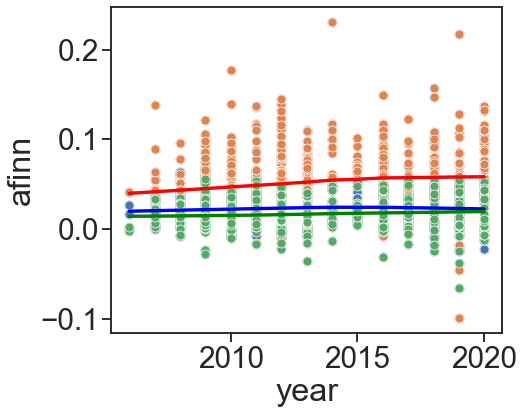

In [9]:
## Now we plot a time series using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

df2= df.loc[df["year"] > 1995]
            
#%matplotlib inline
sns.set()
sns.set_context("talk",font_scale=1.8)
sns.set_style("white")
sns.set_style("ticks")
plt.figure(figsize=(7, 6))

sns.regplot(data=df2, lowess=True, line_kws={"color": "blue"}, x="year", y="blob")
sns.scatterplot(data=df2, x="year", y="blob", ci=None)

sns.regplot(data=df2, lowess=True, line_kws={"color": "red"}, x="year", y="vader")
sns.scatterplot(data=df2, x="year", y="vader", ci=None)

sns.regplot(data=df2, lowess=True, line_kws={"color": "green"}, x="year", y="afinn")
sns.scatterplot(data=df2, x="year", y="afinn", ci=None)


<AxesSubplot:xlabel='year', ylabel='blob'>

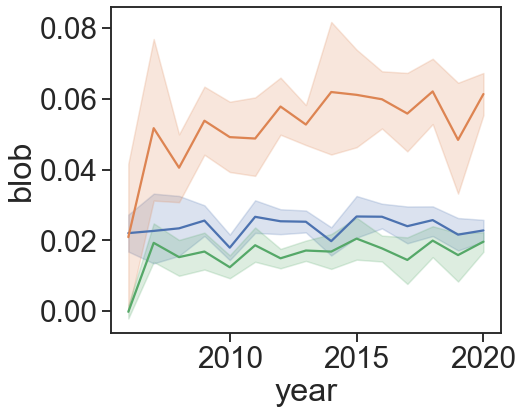

In [10]:
#%matplotlib inline
sns.set()
sns.set_context("talk",font_scale=1.8)
sns.set_style("white")
sns.set_style("ticks")
plt.figure(figsize=(7, 6))


sns.lineplot(data=df2,x="year", y="blob")
sns.lineplot(data=df2,x="year", y="vader")
sns.lineplot(data=df2,x="year", y="afinn")

## Remove outliers

In [11]:
## adding z_scores
from scipy import stats

## Z score columns
cols = list(['blob','vader','afinn'])
for col in cols:
    print(col)
    col_zscore = col + '_zscore'
    df[col_zscore] = stats.zscore(df[col])
df



blob
vader
afinn


,author,year,title,tokenized_text,lines,blob,vader,afinn,blob_zscore,vader_zscore,afinn_zscore
0,aaditya,2012,Climate responsive.txt,"[Climate-responsive, integrability, of, buildi...","[Climate-responsive integrability, of building...",0.047855,0.061887,0.033935,1.661268,0.192495,1.153730
1,abdel,2013,Ski.txt,"[Skills, development, for, retrofitting, a, hi...",[Skills development for retrofitting a histori...,0.041300,0.072724,0.032645,1.203795,0.514291,1.065595
2,abdul,2012,Mod.txt,"[Modeling, of, a, maximum, power, point, track...","[Modeling of a maximum power point tracker, fo...",0.023567,0.044193,0.002559,-0.033835,-0.332882,-0.989641
3,abo,2012,Microaerobic.txt,"[Microaerobic, dark, fermentative, hydrogen, p...","[Microaerobic dark fermentative hydrogen, prod...",0.024127,0.058738,0.019254,0.005298,0.098990,0.150814
4,Abu,2009,compression.txt,"[New, technique, of, air-cooled, absorption, s...","[New technique of air-cooled absorption, syste...",0.020368,0.010689,-0.023200,-0.257050,-1.327745,-2.749251
...,...,...,...,...,...,...,...,...,...,...,...
602,zhu,2020,The influence.txt,"[Cheng, Zhu1,2,, *, 1, Hohai, University,, Col...","[Cheng Zhu1,2, *, 1, Hohai University, College...",0.055344,0.087399,0.043302,2.183939,0.950024,1.793588
603,Zhuetal,2020,aerolastic.txt,"[Aerodynamic, and, structural, optimization, o...","[Aerodynamic and structural optimization of, w...",0.037176,0.072766,0.011186,0.915983,0.515544,-0.400287
604,zishang,2012,Assessment.txt,"[Assessment, of, the, technical, potential, fo...","[Assessment of the technical potential for, mu...",0.022624,0.062567,0.016500,-0.099606,0.212696,-0.037343
605,Zisisetal,2006,heat.txt,"[Investigation, of, the, performance, of, heat...","[Investigation of the performance of heat, pip...",0.027297,0.000216,0.001733,0.226513,-1.638721,-1.046093


In [12]:
import numpy as np
## eliminate outliers Z > 2 and Z < -2

def reject_outliers(data, m = 4.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

df_outliers = df

cols = list(['blob_zscore','vader_zscore','afinn_zscore'])
for col in cols:
    col_out = col + '_outliers'
    df_outliers[col_out] = reject_outliers(df_outliers[col])
df_outliers

,author,year,title,tokenized_text,lines,blob,vader,afinn,blob_zscore,vader_zscore,afinn_zscore,blob_zscore_outliers,vader_zscore_outliers,afinn_zscore_outliers
0,aaditya,2012,Climate responsive.txt,"[Climate-responsive, integrability, of, buildi...","[Climate-responsive integrability, of building...",0.047855,0.061887,0.033935,1.661268,0.192495,1.153730,1.661268,0.192495,1.153730
1,abdel,2013,Ski.txt,"[Skills, development, for, retrofitting, a, hi...",[Skills development for retrofitting a histori...,0.041300,0.072724,0.032645,1.203795,0.514291,1.065595,1.203795,0.514291,1.065595
2,abdul,2012,Mod.txt,"[Modeling, of, a, maximum, power, point, track...","[Modeling of a maximum power point tracker, fo...",0.023567,0.044193,0.002559,-0.033835,-0.332882,-0.989641,-0.033835,-0.332882,-0.989641
3,abo,2012,Microaerobic.txt,"[Microaerobic, dark, fermentative, hydrogen, p...","[Microaerobic dark fermentative hydrogen, prod...",0.024127,0.058738,0.019254,0.005298,0.098990,0.150814,0.005298,0.098990,0.150814
4,Abu,2009,compression.txt,"[New, technique, of, air-cooled, absorption, s...","[New technique of air-cooled absorption, syste...",0.020368,0.010689,-0.023200,-0.257050,-1.327745,-2.749251,-0.257050,-1.327745,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,zhu,2020,The influence.txt,"[Cheng, Zhu1,2,, *, 1, Hohai, University,, Col...","[Cheng Zhu1,2, *, 1, Hohai University, College...",0.055344,0.087399,0.043302,2.183939,0.950024,1.793588,2.183939,0.950024,1.793588
603,Zhuetal,2020,aerolastic.txt,"[Aerodynamic, and, structural, optimization, o...","[Aerodynamic and structural optimization of, w...",0.037176,0.072766,0.011186,0.915983,0.515544,-0.400287,0.915983,0.515544,-0.400287
604,zishang,2012,Assessment.txt,"[Assessment, of, the, technical, potential, fo...","[Assessment of the technical potential for, mu...",0.022624,0.062567,0.016500,-0.099606,0.212696,-0.037343,-0.099606,0.212696,-0.037343
605,Zisisetal,2006,heat.txt,"[Investigation, of, the, performance, of, heat...","[Investigation of the performance of heat, pip...",0.027297,0.000216,0.001733,0.226513,-1.638721,-1.046093,0.226513,-1.638721,-1.046093


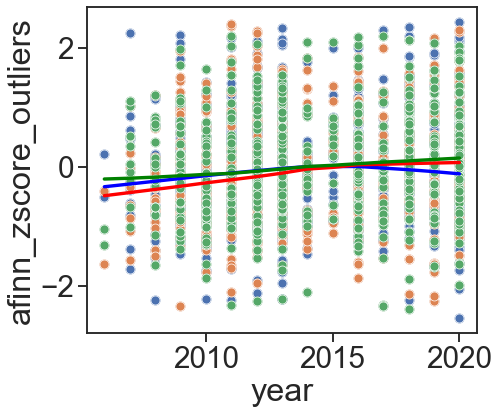

In [13]:
## Now we plot a time series using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

df2= df.loc[df["year"] > 1900]
            
#%matplotlib inline
sns.set()
sns.set_context("talk",font_scale=1.8)
sns.set_style("white")
sns.set_style("ticks")
plt.figure(figsize=(7, 6))

sns.regplot(data=df2, lowess=True, line_kws={"color": "blue"}, x="year", y="blob_zscore_outliers")
sns.scatterplot(data=df2, x="year", y="blob_zscore_outliers", ci=None)

sns.regplot(data=df2, lowess=True, line_kws={"color": "red"}, x="year", y="vader_zscore_outliers")
sns.scatterplot(data=df2, x="year", y="vader_zscore_outliers", ci=None)

sns.regplot(data=df2, lowess=True, line_kws={"color": "green"}, x="year", y="afinn_zscore_outliers")
sns.scatterplot(data=df2, x="year", y="afinn_zscore_outliers", ci=None);

<AxesSubplot:xlabel='year', ylabel='blob_zscore_outliers'>

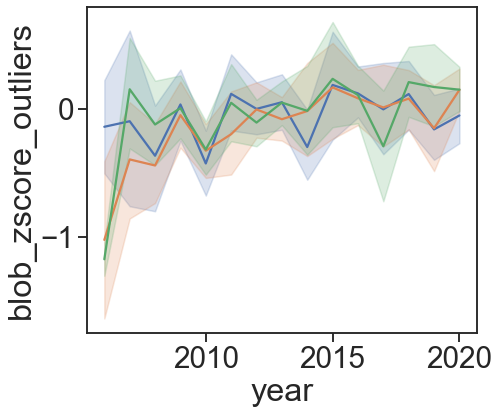

In [14]:
#%matplotlib inline
sns.set()
sns.set_context("talk",font_scale=1.8)
sns.set_style("white")
sns.set_style("ticks")
plt.figure(figsize=(7, 6))

sns.lineplot(data=df2,x="year", y="blob_zscore_outliers")
sns.lineplot(data=df2,x="year", y="vader_zscore_outliers")
sns.lineplot(data=df2,x="year", y="afinn_zscore_outliers")

In [15]:
new_df = df2.drop(['tokenized_text','lines'], axis=1)
new_df.to_csv('climate_sentiments.csv')

In [16]:
import pandas as pd

Step 2: Add socioeconomic data 

In [40]:
### READ CSVS AS DATA FRAMES
base_dir1 = os.getcwd()

list_of_sentiments = pd.read_csv(base_dir1 +'/climate_sentiments.csv')

owiddata  = pd.read_csv(base_dir1 +'/OwidDataGlobal_edited.csv') #owidco2data.csv')

In [41]:
list_of_sentiments

,Unnamed: 0,author,year,title,blob,vader,afinn,blob_zscore,vader_zscore,afinn_zscore,blob_zscore_outliers,vader_zscore_outliers,afinn_zscore_outliers
0,0,aaditya,2012,Climate responsive.txt,0.047855,0.061887,0.033935,1.661268,0.192495,1.153730,1.661268,0.192495,1.153730
1,1,abdel,2013,Ski.txt,0.041300,0.072724,0.032645,1.203795,0.514291,1.065595,1.203795,0.514291,1.065595
2,2,abdul,2012,Mod.txt,0.023567,0.044193,0.002559,-0.033835,-0.332882,-0.989641,-0.033835,-0.332882,-0.989641
3,3,abo,2012,Microaerobic.txt,0.024127,0.058738,0.019254,0.005298,0.098990,0.150814,0.005298,0.098990,0.150814
4,4,Abu,2009,compression.txt,0.020368,0.010689,-0.023200,-0.257050,-1.327745,-2.749251,-0.257050,-1.327745,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,zhu,2020,The influence.txt,0.055344,0.087399,0.043302,2.183939,0.950024,1.793588,2.183939,0.950024,1.793588
603,603,Zhuetal,2020,aerolastic.txt,0.037176,0.072766,0.011186,0.915983,0.515544,-0.400287,0.915983,0.515544,-0.400287
604,604,zishang,2012,Assessment.txt,0.022624,0.062567,0.016500,-0.099606,0.212696,-0.037343,-0.099606,0.212696,-0.037343
605,605,Zisisetal,2006,heat.txt,0.027297,0.000216,0.001733,0.226513,-1.638721,-1.046093,0.226513,-1.638721,-1.046093


In [42]:
owiddata

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,OWID_WRL,World,1750,9.351,NaN,0.00,0.000,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7.456644e+08,NaN,NaN,NaN,NaN
1,OWID_WRL,World,1751,9.351,NaN,0.00,0.000,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OWID_WRL,World,1752,9.354,NaN,0.04,0.004,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OWID_WRL,World,1753,9.354,NaN,0.00,0.000,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OWID_WRL,World,1754,9.358,NaN,0.04,0.004,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,OWID_WRL,World,2016,35452.459,35452.459,-0.12,-43.947,0.0,4.750,4.750,...,6.613,8550.06,1.146,3054.0,0.409,7.464344e+09,1.070000e+14,152944.938,20490.955,1.429
267,OWID_WRL,World,2017,35925.738,35925.738,1.33,473.278,0.0,4.760,4.760,...,NaN,NaN,NaN,NaN,NaN,7.548183e+09,1.100000e+14,155672.784,20624.761,NaN
268,OWID_WRL,World,2018,36646.140,36646.140,2.01,720.402,0.0,4.802,4.802,...,NaN,NaN,NaN,NaN,NaN,7.631091e+09,1.140000e+14,160063.686,20975.203,NaN
269,OWID_WRL,World,2019,36702.503,36702.503,0.15,56.363,0.0,4.758,4.758,...,NaN,NaN,NaN,NaN,NaN,7.713468e+09,NaN,162194.290,21027.415,NaN


In [51]:
## function to add the corresponding socioeconomic value

def add_owid (year,var, dataset):

    var_year = list(owiddata[var][1:])    
    dictionary_var = dict(zip(year, var_year))
    var_list = []
    for item in dataset[0:]['year']:
        print(item)
        var_list += [dictionary_var[item]]
    new_list_of_sentiments[var] =var_list  

In [52]:
## here we count the number of occurences per year and add them to the dataset

counts_per_year =[]

for year in list_of_sentiments['year']:
    counts = owiddata[owiddata["year"]==year].count()
    counts_per_year += [counts]
    print(year,counts)

owid_data.insert(1,'text_per_year',counts_per_year)

2012 iso_code                               1
country                                1
year                                   1
co2                                    1
consumption_co2                        1
co2_growth_prct                        1
co2_growth_abs                         1
trade_co2                              1
co2_per_capita                         1
consumption_co2_per_capita             1
share_global_co2                       1
cumulative_co2                         1
share_global_cumulative_co2            1
co2_per_gdp                            0
consumption_co2_per_gdp                0
co2_per_unit_energy                    1
coal_co2                               1
cement_co2                             1
flaring_co2                            1
gas_co2                                1
oil_co2                                1
other_industry_co2                     1
cement_co2_per_capita                  1
coal_co2_per_capita                    1
flaring_co2

2020 iso_code                               1
country                                1
year                                   1
co2                                    1
consumption_co2                        1
co2_growth_prct                        1
co2_growth_abs                         1
trade_co2                              1
co2_per_capita                         1
consumption_co2_per_capita             1
share_global_co2                       1
cumulative_co2                         1
share_global_cumulative_co2            1
co2_per_gdp                            0
consumption_co2_per_gdp                0
co2_per_unit_energy                    0
coal_co2                               1
cement_co2                             1
flaring_co2                            1
gas_co2                                1
oil_co2                                1
other_industry_co2                     1
cement_co2_per_capita                  1
coal_co2_per_capita                    1
flaring_co2

2009 iso_code                               1
country                                1
year                                   1
co2                                    1
consumption_co2                        1
co2_growth_prct                        1
co2_growth_abs                         1
trade_co2                              1
co2_per_capita                         1
consumption_co2_per_capita             1
share_global_co2                       1
cumulative_co2                         1
share_global_cumulative_co2            1
co2_per_gdp                            0
consumption_co2_per_gdp                0
co2_per_unit_energy                    1
coal_co2                               1
cement_co2                             1
flaring_co2                            1
gas_co2                                1
oil_co2                                1
other_industry_co2                     1
cement_co2_per_capita                  1
coal_co2_per_capita                    1
flaring_co2

dtype: int64
2007 iso_code                               1
country                                1
year                                   1
co2                                    1
consumption_co2                        1
co2_growth_prct                        1
co2_growth_abs                         1
trade_co2                              1
co2_per_capita                         1
consumption_co2_per_capita             1
share_global_co2                       1
cumulative_co2                         1
share_global_cumulative_co2            1
co2_per_gdp                            0
consumption_co2_per_gdp                0
co2_per_unit_energy                    1
coal_co2                               1
cement_co2                             1
flaring_co2                            1
gas_co2                                1
oil_co2                                1
other_industry_co2                     1
cement_co2_per_capita                  1
coal_co2_per_capita                    

2018 iso_code                               1
country                                1
year                                   1
co2                                    1
consumption_co2                        1
co2_growth_prct                        1
co2_growth_abs                         1
trade_co2                              1
co2_per_capita                         1
consumption_co2_per_capita             1
share_global_co2                       1
cumulative_co2                         1
share_global_cumulative_co2            1
co2_per_gdp                            1
consumption_co2_per_gdp                1
co2_per_unit_energy                    1
coal_co2                               1
cement_co2                             1
flaring_co2                            1
gas_co2                                1
oil_co2                                1
other_industry_co2                     1
cement_co2_per_capita                  1
coal_co2_per_capita                    1
flaring_co2

2013 iso_code                               1
country                                1
year                                   1
co2                                    1
consumption_co2                        1
co2_growth_prct                        1
co2_growth_abs                         1
trade_co2                              1
co2_per_capita                         1
consumption_co2_per_capita             1
share_global_co2                       1
cumulative_co2                         1
share_global_cumulative_co2            1
co2_per_gdp                            0
consumption_co2_per_gdp                0
co2_per_unit_energy                    1
coal_co2                               1
cement_co2                             1
flaring_co2                            1
gas_co2                                1
oil_co2                                1
other_industry_co2                     1
cement_co2_per_capita                  1
coal_co2_per_capita                    1
flaring_co2

2013 iso_code                               1
country                                1
year                                   1
co2                                    1
consumption_co2                        1
co2_growth_prct                        1
co2_growth_abs                         1
trade_co2                              1
co2_per_capita                         1
consumption_co2_per_capita             1
share_global_co2                       1
cumulative_co2                         1
share_global_cumulative_co2            1
co2_per_gdp                            0
consumption_co2_per_gdp                0
co2_per_unit_energy                    1
coal_co2                               1
cement_co2                             1
flaring_co2                            1
gas_co2                                1
oil_co2                                1
other_industry_co2                     1
cement_co2_per_capita                  1
coal_co2_per_capita                    1
flaring_co2

2019 iso_code                               1
country                                1
year                                   1
co2                                    1
consumption_co2                        1
co2_growth_prct                        1
co2_growth_abs                         1
trade_co2                              1
co2_per_capita                         1
consumption_co2_per_capita             1
share_global_co2                       1
cumulative_co2                         1
share_global_cumulative_co2            1
co2_per_gdp                            0
consumption_co2_per_gdp                0
co2_per_unit_energy                    1
coal_co2                               1
cement_co2                             1
flaring_co2                            1
gas_co2                                1
oil_co2                                1
other_industry_co2                     1
cement_co2_per_capita                  1
coal_co2_per_capita                    1
flaring_co2

ValueError: Length of values (607) does not match length of index (271)

In [53]:
## add the corresponding socioeconomic value

new_list_of_sentiments= list_of_sentiments[:]
    
year = list(owiddata['year'][1:])   

list_of_vars = ['co2', 'co2_per_capita','co2_growth_prct','co2_growth_abs','cumulative_co2','coal_co2','cumulative_coal_co2','coal_co2_per_capita','gdp']
for var in list_of_vars:
    add_owid(year, var, list_of_sentiments[:])

2012
2013
2012
2012
2009
2013
2019
2011
2012
2012
2016
2016
2016
2020
2018
2009
2010
2020
2020
2020
2011
2011
2012
2016
2013
2016
2019
2020
2020
2014
2020
2020
2011
2019
2020
2010
2018
2019
2019
2010
2016
2016
2019
2014
2010
2019
2020
2016
2013
2018
2012
2012
2013
2016
2016
2015
2020
2013
2013
2016
2016
2019
2020
2015
2013
2008
2012
2017
2020
2009
2020
2020
2018
2008
2013
2016
2011
2010
2009
2013
2008
2017
2020
2012
2019
2012
2013
2013
2013
2018
2008
2012
2013
2015
2012
2019
2018
2013
2009
2020
2008
2009
2010
2010
2012
2012
2012
2012
2012
2016
2016
2018
2018
2014
2014
2013
2012
2009
2020
2008
2010
2013
2014
2012
2013
2013
2018
2009
2011
2013
2013
2016
2020
2016
2011
2013
2012
2013
2013
2011
2012
2019
2017
2011
2016
2018
2018
2012
2017
2016
2020
2013
2014
2014
2019
2008
2020
2020
2017
2018
2012
2017
2020
2013
2010
2010
2013
2011
2017
2012
2016
2009
2010
2015
2010
2013
2018
2009
2014
2013
2017
2016
2020
2017
2012
2012
2016
2012
2012
2018
2013
2019
2009
2009
2018
2020
2014
2010
2011
2019


C:\Users\azeez\AppData\Local\Temp/ipykernel_5864/939595259.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_list_of_sentiments[var] =var_list



2013
2018
2009
2010
2008
2013
2018
2009
2009
2019
2010
2018
2010
2010
2013
2013
2010
2018
2011
2010
2010
2010
2010
2018
2013
2011
2020
2011
2008
2009
2020
2018
2013
2019
2018
2013
2012
2016
2011
2010
2017
2011
2012
2010
2007
2016
2017
2009
2011
2014
2016
2016
2016
2019
2019
2019
2013
2011
2011
2020
2018
2019
2020
2018
2011
2013
2012
2010
2010
2011
2013
2019
2013
2009
2009
2020
2020
2012
2018
2013
2016
2020
2016
2019
2013
2016
2012
2013
2012
2008
2013
2015
2016
2009
2014
2012
2009
2013
2007
2007
2018
2014
2011
2007
2013
2013
2011
2017
2013
2016
2011
2012
2013
2013
2012
2019
2011
2020
2016
2017
2020
2016
2011
2008
2020
2011
2016
2020
2020
2016
2020
2018
2015
2019
2015
2016
2012
2013
2009
2018
2020
2015
2015
2018
2018
2017
2013
2020
2010
2007
2020
2009
2011
2011
2010
2018
2020
2020
2014
2019
2020
2019
2013
2013
2013
2013
2020
2009
2013
2010
2009
2011
2020
2019
2012
2016
2020
2020
2017
2019
2012
2018
2018
2009
2010
2013
2017
2013
2008
2009
2010
2013
2008
2015
2019
2011
2011
2010
2010
2013

In [54]:
new_list_of_sentiments

,Unnamed: 0,author,year,title,blob,vader,afinn,blob_zscore,vader_zscore,afinn_zscore,...,afinn_zscore_outliers,co2,co2_per_capita,co2_growth_prct,co2_growth_abs,cumulative_co2,coal_co2,cumulative_coal_co2,coal_co2_per_capita,gdp
0,0,aaditya,2012,Climate responsive.txt,0.047855,0.061887,0.033935,1.661268,0.192495,1.153730,...,1.153730,34974.075,4.908,1.47,505.624,1410676.204,14949.697,671456.267,2.098,NaN
1,1,abdel,2013,Ski.txt,0.041300,0.072724,0.032645,1.203795,0.514291,1.065595,...,1.065595,35283.025,4.893,0.88,308.950,1445959.229,15042.880,686499.147,2.086,NaN
2,2,abdul,2012,Mod.txt,0.023567,0.044193,0.002559,-0.033835,-0.332882,-0.989641,...,-0.989641,34974.075,4.908,1.47,505.624,1410676.204,14949.697,671456.267,2.098,NaN
3,3,abo,2012,Microaerobic.txt,0.024127,0.058738,0.019254,0.005298,0.098990,0.150814,...,0.150814,34974.075,4.908,1.47,505.624,1410676.204,14949.697,671456.267,2.098,NaN
4,4,Abu,2009,compression.txt,0.020368,0.010689,-0.023200,-0.257050,-1.327745,-2.749251,...,NaN,31607.042,4.599,-1.44,-462.402,1307890.377,13067.147,627754.514,1.901,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,zhu,2020,The influence.txt,0.055344,0.087399,0.043302,2.183939,0.950024,1.793588,...,1.793588,34807.259,4.465,-5.16,-1895.244,1696524.177,13976.098,788362.044,1.793,NaN
603,603,Zhuetal,2020,aerolastic.txt,0.037176,0.072766,0.011186,0.915983,0.515544,-0.400287,...,-0.400287,34807.259,4.465,-5.16,-1895.244,1696524.177,13976.098,788362.044,1.793,NaN
604,604,zishang,2012,Assessment.txt,0.022624,0.062567,0.016500,-0.099606,0.212696,-0.037343,...,-0.037343,34974.075,4.908,1.47,505.624,1410676.204,14949.697,671456.267,2.098,NaN
605,605,Zisisetal,2006,heat.txt,0.027297,0.000216,0.001733,0.226513,-1.638721,-1.046093,...,-1.046093,30583.530,4.617,3.31,980.753,1212720.149,12222.242,588641.324,1.845,NaN


In [56]:

new_list_of_sentiments.to_csv('Global_Climate_Sentiment&OWID.csv') 